<a href="https://colab.research.google.com/github/villafue/Machine_Learning_Notes/blob/master/Unsupervised%20Learning/Unsupervised%20Learning%20in%20Python/2%20Visualization%20with%20hierarchical%20clustering%20and%20t-SNE/2_Visualization_with_hierarchical_clustering_and_t_SNE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualization with hierarchical clustering and t-SNE

In this chapter, you'll learn about two unsupervised learning techniques for data visualization, hierarchical clustering and t-SNE. Hierarchical clustering merges the data samples into ever-coarser clusters, yielding a tree visualization of the resulting cluster hierarchy. t-SNE maps the data samples into 2d space so that the proximity of the samples to one another can be visualized.

# 1. Visualizing hierarchies
A huge part of your work as a data scientist will be the communication of your insights to other people.

2. Visualizations communicate insight
Visualizations are an excellent way to share your findings, particularly with a non-technical audience. In this chapter, you'll learn about two unsupervised learning techniques for visualization: t-SNE and hierarchical clustering. t-SNE, which we'll consider later, creates a 2d map of any dataset, and conveys useful information about the proximity of the samples to one another. First up, however, let's learn about hierarchical clustering.

3. A hierarchy of groups
You've already seen many hierarchical clusterings in the real world. For example, living things can be organized into small narrow groups, like humans, apes, snakes and lizards, or into larger, broader groups like mammals and reptiles, or even broader groups like animals and plants. These groups are contained in one another, and form a hierarchy. Analogously, hierarchical clustering arranges samples into a hierarchy of clusters.

4. Eurovision scoring dataset
Hierarchical clustering can organize any sort of data into a hierarchy, not just samples of plants and animals. Let's consider a new type of dataset, describing how countries scored performances at the Eurovision 2016 song contest. The data is arranged in a rectangular array, where the rows of the array show how many points a country gave to each song. The "samples" in this case are the countries.

1 http://www.eurovision.tv/page/results
5. Hierarchical clustering of voting countries
The result of applying hierarchical clustering to the Eurovision scores can be visualized as a tree-like diagram called a "dendrogram". This single picture reveals a great deal of information about the voting behavior of countries at the Eurovision. The dendrogram groups the countries into larger and larger clusters, and many of these clusters are immediately recognizable as containing countries that are close to one another geographically, or that have close cultural or political ties, or that belong to single language group. So hierarchical clustering can produce great visualizations. But how does it work?

6. Hierarchical clustering
Hierarchical clustering proceeds in steps. In the beginning, every country is its own cluster - so there are as many clusters as there are countries! At each step, the two closest clusters are merged. This decreases the number of clusters, and eventually, there is only one cluster left, and it contains all the countries. This process is actually a particular type of hierarchical clustering called "agglomerative clustering" - there is also "divisive clustering", which works the other way around. We haven't defined yet what it means for two clusters to be close, but we'll revisit that later on.

7. The dendrogram of a hierarchical clustering
The entire process of the hierarchical clustering is encoded in the dendrogram. At the bottom, each country is in a cluster of its own. The clustering then proceeds from the bottom up. Clusters are represented as vertical lines, and a joining of vertical lines indicates a merging of clusters. To understand better, let's zoom in

8. The dendrogram of a hierarchical clustering
and look at just one part of this dendrogram.

9. Dendrograms, step-by-step
In the beginning, there are six clusters, each containing only one country.

10. Dendrograms, step-by-step
The first merging is here, where the clusters containing Cyprus and Greece are merged together in a single cluster.

11. Dendrograms, step-by-step
Later on, this new cluster is merged with the cluster containing Bulgaria.

12. Dendrograms, step-by-step
Shortly after that, the clusters containing Moldova and Russia are merged,

13. Dendrograms, step-by-step
which later is in turn merged with the cluster containing Armenia.

14. Dendrograms, step-by-step
Later still, the two big composite clusters are merged together. This process continues

15. Dendrograms, step-by-step
until there is only one cluster left, and it contains all the countries.

16. Hierarchical clustering with SciPy
We'll use functions from scipy to perform a hierarchical clustering on the array of scores. For the dendrogram, we'll also need a list of country names. Firstly, import the linkage and dendrogram functions. Then, apply the linkage function to the sample array. Its the linkage function that performs the hierarchical clustering. Notice there is an extra method parameter - we'll cover that in the next video. Now pass the output of linkage to the dendrogram function, specifying the list of country names as the labels parameter. In the next video, you'll learn how to extract information from a hierarchical clustering,

17. Let's practice!
But for now, let's see what hierarchical clustering can do with some real-world datasets.

# How many merges?
If there are 5 data samples, how many merge operations will occur in a hierarchical clustering? (To help answer this question, think back to the video, in which Ben walked through an example of hierarchical clustering using 6 countries.)

Wrong Answers

- 3 merges.

- This can't be known in advance.

Correct Answer

- 4 merges.

 - Well done! With 5 data samples, there would be 4 merge operations, and with 6 data samples, there would be 5 merges, and so on.


# Hierarchical clustering of the grain data
In the video, you learned that the SciPy linkage() function performs hierarchical clustering on an array of samples. Use the linkage() function to obtain a hierarchical clustering of the grain samples, and use dendrogram() to visualize the result. A sample of the grain measurements is provided in the array samples, while the variety of each grain sample is given by the list varieties.

Instructions

1. Import:
 - linkage and dendrogram from scipy.cluster.hierarchy.
 - matplotlib.pyplot as plt.

2. Perform hierarchical clustering on samples using the linkage() function with the method='complete' keyword argument. Assign the result to mergings.

3. Plot a dendrogram using the dendrogram() function on mergings. Specify the keyword arguments labels=varieties, leaf_rotation=90, and leaf_font_size=6.

In [ ]:
In [1]:
samples
Out[1]:

array([[14.88  , 14.57  ,  0.8811,  5.554 ,  3.333 ,  1.018 ,  4.956 ],
       [14.69  , 14.49  ,  0.8799,  5.563 ,  3.259 ,  3.586 ,  5.219 ],
       [14.03  , 14.16  ,  0.8796,  5.438 ,  3.201 ,  1.717 ,  5.001 ],
       [13.99  , 13.83  ,  0.9183,  5.119 ,  3.383 ,  5.234 ,  4.781 ],
       [14.11  , 14.26  ,  0.8722,  5.52  ,  3.168 ,  2.688 ,  5.219 ],
       [13.02  , 13.76  ,  0.8641,  5.395 ,  3.026 ,  3.373 ,  4.825 ],
       [15.49  , 14.94  ,  0.8724,  5.757 ,  3.371 ,  3.412 ,  5.228 ],
       [16.2   , 15.27  ,  0.8734,  5.826 ,  3.464 ,  2.823 ,  5.527 ],
       [13.5   , 13.85  ,  0.8852,  5.351 ,  3.158 ,  2.249 ,  5.176 ],
       [15.36  , 14.76  ,  0.8861,  5.701 ,  3.393 ,  1.367 ,  5.132 ],
       [15.78  , 14.91  ,  0.8923,  5.674 ,  3.434 ,  5.593 ,  5.136 ],
       [14.46  , 14.35  ,  0.8818,  5.388 ,  3.377 ,  2.802 ,  5.044 ],
       [11.23  , 12.63  ,  0.884 ,  4.902 ,  2.879 ,  2.269 ,  4.703 ],
       [14.34  , 14.37  ,  0.8726,  5.63  ,  3.19  ,  1.313 ,  5.15  ],
       [16.84  , 15.67  ,  0.8623,  5.998 ,  3.484 ,  4.675 ,  5.877 ],
       [17.32  , 15.91  ,  0.8599,  6.064 ,  3.403 ,  3.824 ,  5.922 ],
       [18.72  , 16.19  ,  0.8977,  6.006 ,  3.857 ,  5.324 ,  5.879 ],
       [18.88  , 16.26  ,  0.8969,  6.084 ,  3.764 ,  1.649 ,  6.109 ],
       [18.76  , 16.2   ,  0.8984,  6.172 ,  3.796 ,  3.12  ,  6.053 ],
       [19.31  , 16.59  ,  0.8815,  6.341 ,  3.81  ,  3.477 ,  6.238 ],
       [17.99  , 15.86  ,  0.8992,  5.89  ,  3.694 ,  2.068 ,  5.837 ],
       [18.85  , 16.17  ,  0.9056,  6.152 ,  3.806 ,  2.843 ,  6.2   ],
       [19.38  , 16.72  ,  0.8716,  6.303 ,  3.791 ,  3.678 ,  5.965 ],
       [18.96  , 16.2   ,  0.9077,  6.051 ,  3.897 ,  4.334 ,  5.75  ],
       [18.14  , 16.12  ,  0.8772,  6.059 ,  3.563 ,  3.619 ,  6.011 ],
       [18.65  , 16.41  ,  0.8698,  6.285 ,  3.594 ,  4.391 ,  6.102 ],
       [18.94  , 16.32  ,  0.8942,  6.144 ,  3.825 ,  2.908 ,  5.949 ],
       [17.36  , 15.76  ,  0.8785,  6.145 ,  3.574 ,  3.526 ,  5.971 ],
       [13.32  , 13.94  ,  0.8613,  5.541 ,  3.073 ,  7.035 ,  5.44  ],
       [11.43  , 13.13  ,  0.8335,  5.176 ,  2.719 ,  2.221 ,  5.132 ],
       [12.01  , 13.52  ,  0.8249,  5.405 ,  2.776 ,  6.992 ,  5.27  ],
       [11.34  , 12.87  ,  0.8596,  5.053 ,  2.849 ,  3.347 ,  5.003 ],
       [12.02  , 13.33  ,  0.8503,  5.35  ,  2.81  ,  4.271 ,  5.308 ],
       [12.44  , 13.59  ,  0.8462,  5.319 ,  2.897 ,  4.924 ,  5.27  ],
       [11.55  , 13.1   ,  0.8455,  5.167 ,  2.845 ,  6.715 ,  4.956 ],
       [11.26  , 13.01  ,  0.8355,  5.186 ,  2.71  ,  5.335 ,  5.092 ],
       [12.46  , 13.41  ,  0.8706,  5.236 ,  3.017 ,  4.987 ,  5.147 ],
       [11.81  , 13.45  ,  0.8198,  5.413 ,  2.716 ,  4.898 ,  5.352 ],
       [11.27  , 12.86  ,  0.8563,  5.091 ,  2.804 ,  3.985 ,  5.001 ],
       [12.79  , 13.53  ,  0.8786,  5.224 ,  3.054 ,  5.483 ,  4.958 ],
       [12.67  , 13.32  ,  0.8977,  4.984 ,  3.135 ,  2.3   ,  4.745 ],
       [11.23  , 12.88  ,  0.8511,  5.14  ,  2.795 ,  4.325 ,  5.003 ]])

In [2]:
varieties
Out[2]:

['Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat']

 # Perform the necessary imports
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Calculate the linkage: mergings
mergings = linkage(samples, method='complete')

# Plot the dendrogram, using varieties as labels
dendrogram(mergings,
           labels=varieties,
           leaf_rotation=90,
           leaf_font_size=6,
)
plt.show()

**Conclusion**

Superb! Dendrograms are a great way to illustrate the arrangement of the clusters produced by hierarchical clustering.

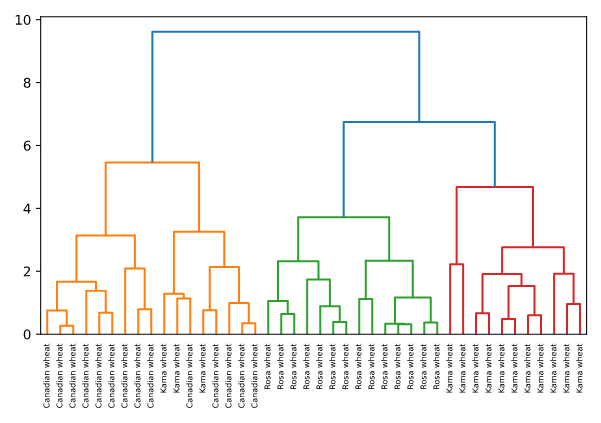


# Hierarchies of stocks
In chapter 1, you used k-means clustering to cluster companies according to their stock price movements. Now, you'll perform hierarchical clustering of the companies. You are given a NumPy array of price movements movements, where the rows correspond to companies, and a list of the company names companies. SciPy hierarchical clustering doesn't fit into a sklearn pipeline, so you'll need to use the normalize() function from sklearn.preprocessing instead of Normalizer.

linkage and dendrogram have already been imported from scipy.cluster.hierarchy, and PyPlot has been imported as plt.

Instructions

1. Import normalize from sklearn.preprocessing.

2. Rescale the price movements for each stock by using the normalize() function on movements.

3. Apply the linkage() function to normalized_movements, using 'complete' linkage, to calculate the hierarchical clustering. Assign the result to mergings.

4. Plot a dendrogram of the hierarchical clustering, using the list companies of company names as the labels. In addition, specify the leaf_rotation=90, and leaf_font_size=6 keyword arguments as you did in the previous exercise.


In [ ]:
# Import normalize
from sklearn.preprocessing import normalize

# Normalize the movements: normalized_movements
normalized_movements = normalize(movements)

# Calculate the linkage: mergings
mergings = linkage(normalized_movements, method='complete')

# Plot the dendrogram
dendrogram(mergings, labels=companies, leaf_rotation=90, leaf_font_size=6)
plt.show()

**Conclusion**

Great work! You can produce great visualizations such as this with hierarchical clustering, but it can be used for more than just visualizations. You'll find out more about this in the next video!

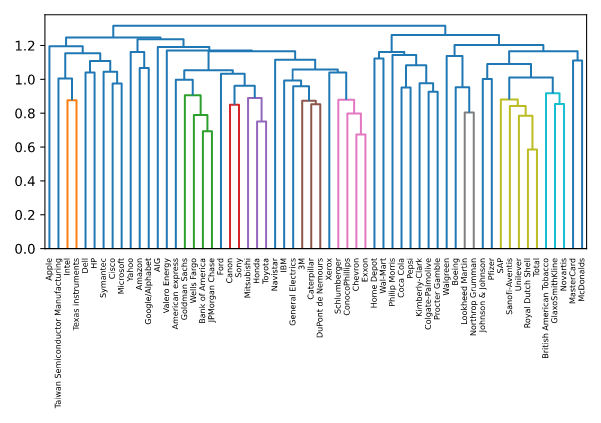


# 1. Cluster labels in hierarchical clustering
In the previous video, we employed hierarchical clustering

2. Cluster labels in hierarchical clustering
to create a great visualization of the voting behavior at the Eurovision. But hierarchical clustering is not only a visualization tool. In this video, you'll learn how to extract the clusters from intermediate stages of a hierarchical clustering. The cluster labels for these intermediate clusterings can then be used in further computations, such as cross tabulations, just like the cluster labels from k-means.

3. Intermediate clusterings & height on dendrogram
An intermediate stage in the hierarchical clustering is specified by choosing a height on the dendrogram. For example, choosing a height of 15 defines a clustering in which Bulgaria, Cyprus and Greece are in one cluster, Russia and Moldova are in another, and Armenia is in a cluster on its own. But what is the meaning of the height?

4. Dendrograms show cluster distances
The y-axis of the dendrogram encodes the distance between merging clusters. For example, the distance between the cluster containing Cyprus and the cluster containing Greece was approximately 6 when they were merged into a single cluster.

5. Dendrograms show cluster distances
When this new cluster was merged with the cluster containing Bulgaria, the distance between them was 12.

6. Intermediate clusterings & height on dendrogram
So the height that specifies an intermediate clustering corresponds to a distance. This specifies that the hierarchical clustering should stop merging clusters when all clusters are at least this far apart.

7. Distance between clusters
The distance between two clusters is measured using a "linkage method". In our example, we used "complete" linkage, where the distance between two clusters is the maximum of the distances between their samples. This was specified via the "method" parameter. There are many other linkage methods, and you'll see in the exercises that different linkage methods give different hierarchical clusterings!

8. Extracting cluster labels
The cluster labels for any intermediate stage of the hierarchical clustering can be extracted using the fcluster function. Let's try it out, specifying the height of 15.

9. Extracting cluster labels using fcluster
After performing the hierarchical clustering of the Eurovision data, import the fcluster function. Then pass the result of the linkage function to the fcluster function, specifying the height as the second argument. This returns a numpy array containing the cluster labels for all the countries.

10. Aligning cluster labels with country names
To inspect cluster labels, let's use a DataFrame to align the labels with the country names. Firstly, import pandas, then create the data frame, and then sort by cluster label, printing the result. As expected, the cluster labels group Bulgaria, Greece and Cyprus in the same cluster. But do note that the scipy cluster labels start at 1, not at 0 like they do in scikit-learn.

11. Let's practice!
Now that you've learned how to extract cluster labels from a hierarchical clustering, let's put your new skills into practice!

# Which clusters are closest?
In the video, you learned that the linkage method defines how the distance between clusters is measured. In complete linkage, the distance between clusters is the distance between the furthest points of the clusters. In single linkage, the distance between clusters is the distance between the closest points of the clusters.

Consider the three clusters in the diagram. Which of the following statements are true?

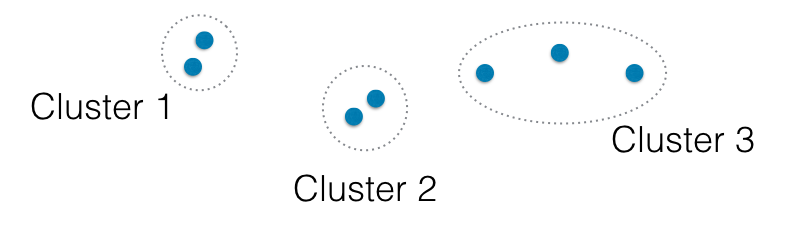

A. In single linkage, Cluster 3 is the closest to Cluster 2.

B. In complete linkage, Cluster 1 is the closest to Cluster 2.

Wrong Answers

- Neither A nor B.

- A only.

Correct Answer

Both A and B.

# Different linkage, different hierarchical clustering!
In the video, you saw a hierarchical clustering of the voting countries at the Eurovision song contest using 'complete' linkage. Now, perform a hierarchical clustering of the voting countries with 'single' linkage, and compare the resulting dendrogram with the one in the video. Different linkage, different hierarchical clustering!

You are given an array samples. Each row corresponds to a voting country, and each column corresponds to a performance that was voted for. The list country_names gives the name of each voting country. This dataset was obtained from Eurovision.

Instructions

1. Import linkage and dendrogram from scipy.cluster.hierarchy.

2. Perform hierarchical clustering on samples using the linkage() function with the method='single' keyword argument. Assign the result to mergings.

3. Plot a dendrogram of the hierarchical clustering, using the list country_names as the labels. In addition, specify the leaf_rotation=90, and leaf_font_size=6 keyword arguments as you have done earlier.

In [ ]:
# Perform the necessary imports
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

# Calculate the linkage: mergings
mergings = linkage(samples, method='single')

# Plot the dendrogram
dendrogram(mergings, labels=country_names, leaf_rotation=90, leaf_font_size=6)
plt.show()


**Conclusion**

Great work! As you can see, performing single linkage hierarchical clustering produces a different dendrogram!

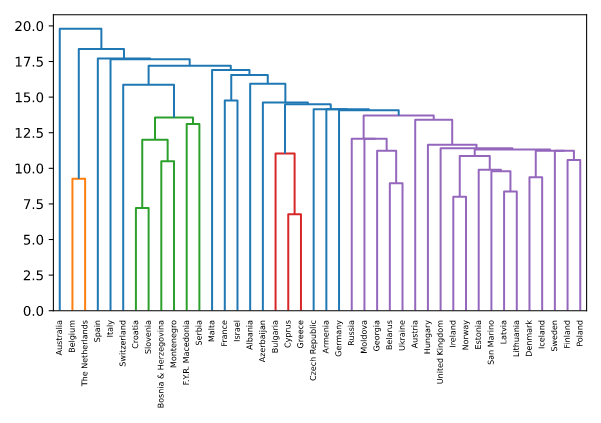

# Intermediate clusterings

Displayed below is the dendrogram for the hierarchical clustering of the grain samples that you computed earlier. If the hierarchical clustering were stopped at height 6 on the dendrogram, how many clusters would there be?

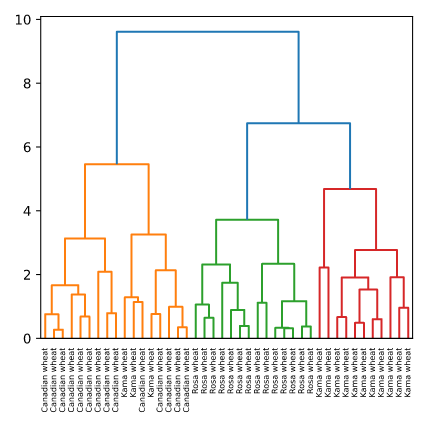

Wrong Answers

- 1.

- As many as there were at the beginning.

Correct Answer

- 3.




# Extracting the cluster labels
In the previous exercise, you saw that the intermediate clustering of the grain samples at height 6 has 3 clusters. Now, use the fcluster() function to extract the cluster labels for this intermediate clustering, and compare the labels with the grain varieties using a cross-tabulation.

The hierarchical clustering has already been performed and mergings is the result of the linkage() function. The list varieties gives the variety of each grain sample.

Instructions

1. Import:
 - pandas as pd.
 - fcluster from scipy.cluster.hierarchy.

2. Perform a flat hierarchical clustering by using the fcluster() function on mergings. Specify a maximum height of 6 and the keyword argument criterion='distance'.

3. Create a DataFrame df with two columns named 'labels' and 'varieties', using labels and varieties, respectively, for the column values. This has been done for you.

4. Create a cross-tabulation ct between df['labels'] and df['varieties'] to count the number of times each grain variety coincides with each cluster label.

In [ ]:
# Perform the necessary imports
import pandas as pd
from scipy.cluster.hierarchy import fcluster

# Use fcluster to extract labels: labels
labels = fcluster(mergings, 6, criterion='distance')

# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'varieties': varieties})

# Create crosstab: ct
ct = pd.crosstab(df.labels, df.varieties)

# Display ct
print(ct)

'''
<script.py> output:
    varieties  Canadian wheat  Kama wheat  Rosa wheat
    labels                                           
    1                      14           3           0
    2                       0           0          14
    3                       0          11           0
'''

**Conclusion**

Fantastic - you've now mastered the fundamentals of k-Means and agglomerative hierarchical clustering. Next, you'll learn about t-SNE, which is a powerful tool for visualizing high dimensional data.

# 1. Cluster labels in hierarchical clustering
In the previous video, we employed hierarchical clustering

2. Cluster labels in hierarchical clustering
to create a great visualization of the voting behavior at the Eurovision. But hierarchical clustering is not only a visualization tool. In this video, you'll learn how to extract the clusters from intermediate stages of a hierarchical clustering. The cluster labels for these intermediate clusterings can then be used in further computations, such as cross tabulations, just like the cluster labels from k-means.

3. Intermediate clusterings & height on dendrogram
An intermediate stage in the hierarchical clustering is specified by choosing a height on the dendrogram. For example, choosing a height of 15 defines a clustering in which Bulgaria, Cyprus and Greece are in one cluster, Russia and Moldova are in another, and Armenia is in a cluster on its own. But what is the meaning of the height?

4. Dendrograms show cluster distances
The y-axis of the dendrogram encodes the distance between merging clusters. For example, the distance between the cluster containing Cyprus and the cluster containing Greece was approximately 6 when they were merged into a single cluster.

5. Dendrograms show cluster distances
When this new cluster was merged with the cluster containing Bulgaria, the distance between them was 12.

6. Intermediate clusterings & height on dendrogram
So the height that specifies an intermediate clustering corresponds to a distance. This specifies that the hierarchical clustering should stop merging clusters when all clusters are at least this far apart.

7. Distance between clusters
The distance between two clusters is measured using a "linkage method". In our example, we used "complete" linkage, where the distance between two clusters is the maximum of the distances between their samples. This was specified via the "method" parameter. There are many other linkage methods, and you'll see in the exercises that different linkage methods give different hierarchical clusterings!

8. Extracting cluster labels
The cluster labels for any intermediate stage of the hierarchical clustering can be extracted using the fcluster function. Let's try it out, specifying the height of 15.

9. Extracting cluster labels using fcluster
After performing the hierarchical clustering of the Eurovision data, import the fcluster function. Then pass the result of the linkage function to the fcluster function, specifying the height as the second argument. This returns a numpy array containing the cluster labels for all the countries.

10. Aligning cluster labels with country names
To inspect cluster labels, let's use a DataFrame to align the labels with the country names. Firstly, import pandas, then create the data frame, and then sort by cluster label, printing the result. As expected, the cluster labels group Bulgaria, Greece and Cyprus in the same cluster. But do note that the scipy cluster labels start at 1, not at 0 like they do in scikit-learn.

11. Let's practice!
Now that you've learned how to extract cluster labels from a hierarchical clustering, let's put your new skills into practice!

# t-SNE visualization of grain dataset
In the video, you saw t-SNE applied to the iris dataset. In this exercise, you'll apply t-SNE to the grain samples data and inspect the resulting t-SNE features using a scatter plot. You are given an array samples of grain samples and a list variety_numbers giving the variety number of each grain sample.

Instructions

1. Import TSNE from sklearn.manifold.

2. Create a TSNE instance called model with learning_rate=200.

3. Apply the .fit_transform() method of model to samples. Assign the result to tsne_features.

4. Select the column 0 of tsne_features. Assign the result to xs.

5. Select the column 1 of tsne_features. Assign the result to ys.

6. Make a scatter plot of the t-SNE features xs and ys. To color the points by the grain variety, specify the additional keyword argument c=variety_numbers.

In [ ]:
# Import TSNE
from sklearn.manifold import TSNE

# Create a TSNE instance: model
model = TSNE(learning_rate=200)

# Apply fit_transform to samples: tsne_features
tsne_features = model.fit_transform(samples)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1st feature: ys
ys = tsne_features[:,1]

# Scatter plot, coloring by variety_numbers
plt.scatter(xs, ys, c=variety_numbers)
plt.show()

**Conclusion**

Excellent! As you can see, the t-SNE visualization manages to separate the 3 varieties of grain samples. But how will it perform on the stock data? You'll find out in the next exercise!

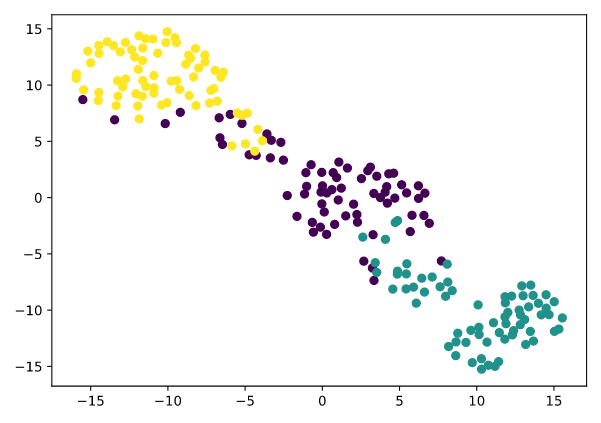

# A t-SNE map of the stock market
t-SNE provides great visualizations when the individual samples can be labeled. In this exercise, you'll apply t-SNE to the company stock price data. A scatter plot of the resulting t-SNE features, labeled by the company names, gives you a map of the stock market! The stock price movements for each company are available as the array normalized_movements (these have already been normalized for you). The list companies gives the name of each company. PyPlot (plt) has been imported for you.

Instructions

1. Import TSNE from sklearn.manifold.

2. Create a TSNE instance called model with learning_rate=50.

3. Apply the .fit_transform() method of model to normalized_movements. Assign the result to tsne_features.

4. Select column 0 and column 1 of tsne_features.

5. Make a scatter plot of the t-SNE features xs and ys. Specify the additional keyword argument alpha=0.5.

6. Code to label each point with its company name has been written for you using plt.annotate(), so just hit 'Submit Answer' to see the visualization!

In [ ]:
# Import TSNE
from sklearn.manifold import TSNE

# Create a TSNE instance: model
model = TSNE(learning_rate=50)

# Apply fit_transform to normalized_movements: tsne_features
tsne_features = model.fit_transform(normalized_movements)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1th feature: ys
ys = tsne_features[:,1]

# Scatter plot
plt.scatter(xs, ys, alpha=0.5)

# Annotate the points
for x, y, company in zip(xs, ys, companies):
    plt.annotate(company, (x, y), fontsize=5, alpha=0.75)
plt.show()

**Conclusion**

Fantastic! It's visualizations such as this that make t-SNE such a powerful tool for extracting quick insights from high dimensional data.

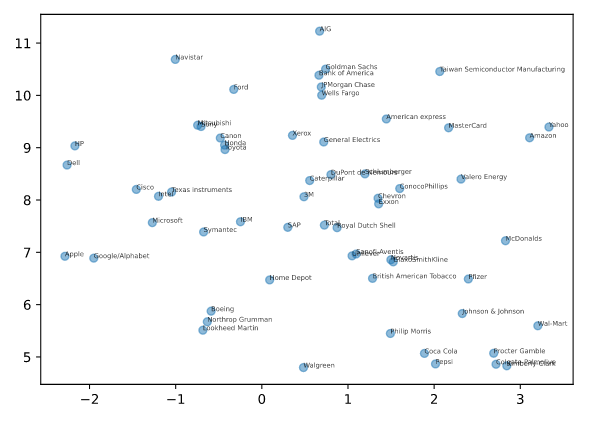